# Digital Image Enhancement: Overview and Importance in Medical Imaging

**Image Enhancement Method:**
Image enhancement refers to the process of adjusting images to make them more suitable for specific applications. The goal is to enhance certain features of the image, making it more interpretable or visually pleasing. This process can involve increasing the contrast, sharpening edges, reducing noise, or adjusting brightness levels.

**Why Image Enhancement is Crucial in Processing Medical Images:**
In medical imaging, clarity and accuracy are paramount. Image enhancement helps in:
Highlighting Critical Details: Enhancing subtle structures in medical images can aid in accurate diagnosis.
Reducing Noise: Medical images often contain noise due to various factors, and enhancement techniques can reduce this noise.
Improving Contrast: Enhancing contrast helps in better differentiation between various tissues, organs, and abnormalities.
Assisting in Automated Diagnosis: Enhanced images improve the performance of algorithms used in computer-aided diagnosis (CAD) systems.

# **Classification of Image Enhancement Methods**
Image enhancement methods can be broadly classified into:

**Spatial Domain Methods:**

-Operate directly on pixels.

-Examples: Histogram Equalization (HE), Gamma Correction.

**Frequency Domain Methods:**

-Operate on the Fourier transform of an image.

-Examples: Filtering techniques like Gaussian filters.

**Transform Domain Methods:**

-Operate on various transforms like Wavelet or DCT.

-Examples: Wavelet-based enhancement.

# **Image Enhancement Methods with Python Code**
Here’s how you can implement some of these enhancement techniques:


##Color Enhancement based method


**1.Gamma Correction:**
Adjusts the brightness of an image by transforming pixel values using a gamma value.

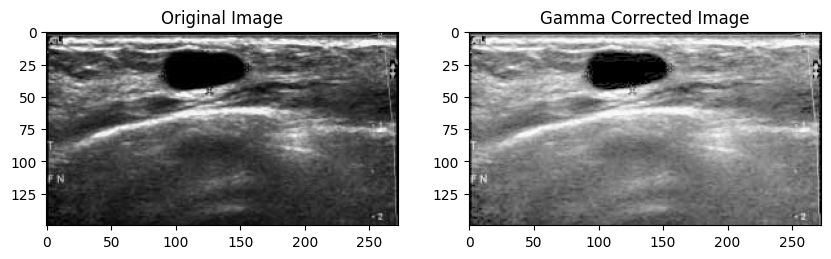

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/bus.jpg')
gamma_corrected = gamma_correction(image, gamma=2.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()


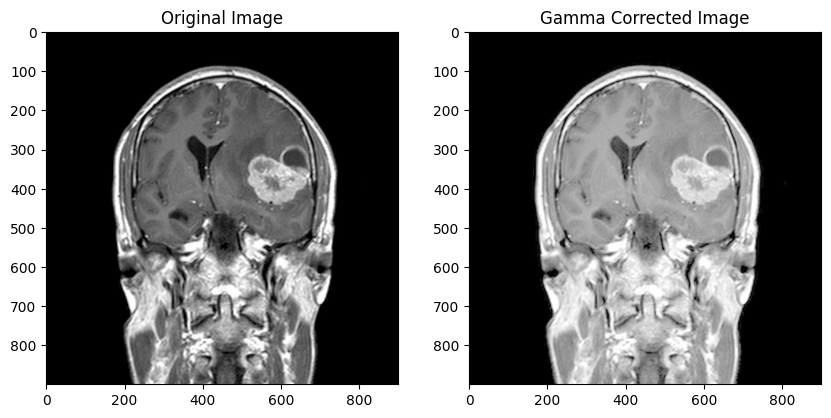

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Load image
image = cv2.imread('/content/Copy of brain.jpg')
gamma_corrected = gamma_correction(image, gamma=2.0)

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image')
plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
plt.show()


##Histogram-Based Methods

**Contrast-limited Adaptive Histogram Equalization (CLAHE):**Enhances contrast in small regions of the image.



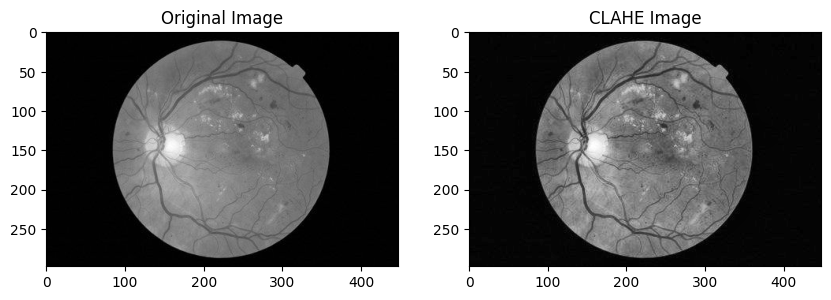

In [ ]:
def clahe(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    if image is not None: # Check if image was loaded successfully
        if len(image.shape) == 2:
            return clahe.apply(image)
        elif len(image.shape) == 3:
            channels = cv2.split(image)
            clahe_channels = [clahe.apply(ch) for ch in channels]
            return cv2.merge(clahe_channels)
    else:
        return None # Handle the case where image is None

# Load image. Make sure 'image_path' is correct.
image_path = '/content/Fundus image.png'
#image_path = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread(image_path, 0)
clahe_image = clahe(image)

# Display the result
if clahe_image is not None: # Check if CLAHE was applied successfully
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('CLAHE Image')
    plt.imshow(clahe_image, cmap='gray')
    plt.show()
else:
    print("Failed to load or apply CLAHE to the image. Check the file path.")


##Spatial Filtering


**Averaging Filter**: Smooths an image by replacing each pixel's value with the average of its neighboring pixels

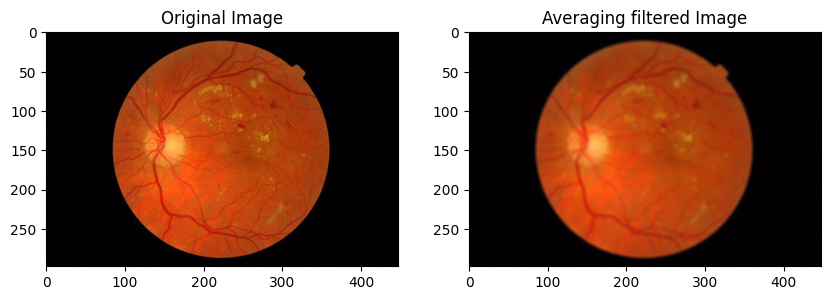

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('/content/Fundus image.png')

avg = cv.blur(image,(5,5))

# Display the result
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Averaging filtered Image')
plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB))
plt.show()

##Image Noise

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

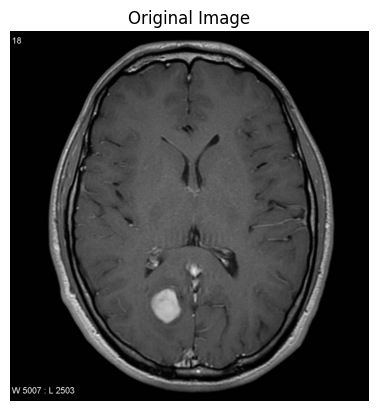

In [ ]:
from PIL import Image

# If it's a local file path, use this:
img = Image.open('/content/brain mri.jpg')

img = np.array(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

Adding Gaussian noise

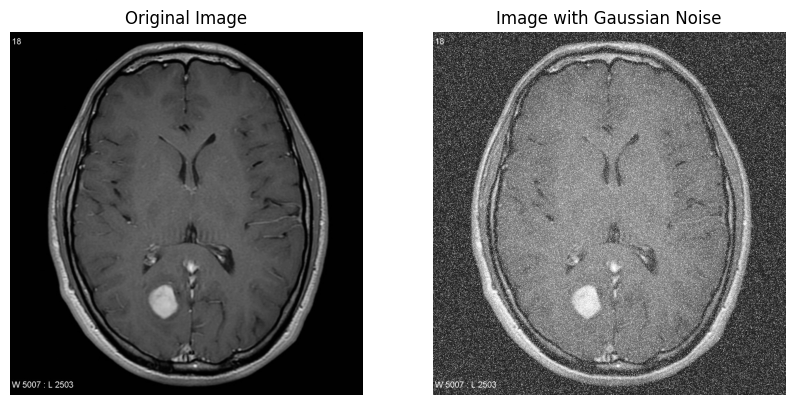

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Add Gaussian noise to an image.

    Parameters:
    - image: The input image to which noise is added.
    - mean: The mean of the Gaussian distribution .
    - sigma: The standard deviation of the Gaussian distribution .

    Returns:
    - noisy_image: The image with added Gaussian noise.
    """
    # Generate Gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype('uint8')

    # Add the noise to the original image
    noisy_image = cv2.add(image, gaussian_noise)

    return noisy_image

# Load image in grayscale
image = cv2.imread('/content/brain mri.jpg', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise to the image
noisy_image = add_gaussian_noise(image, mean=40, sigma=30)

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes for cleaner display
plt.subplot(1, 2, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')  # Hide axes for cleaner display
plt.show()

##Morphological Operation

Erosion Dilation

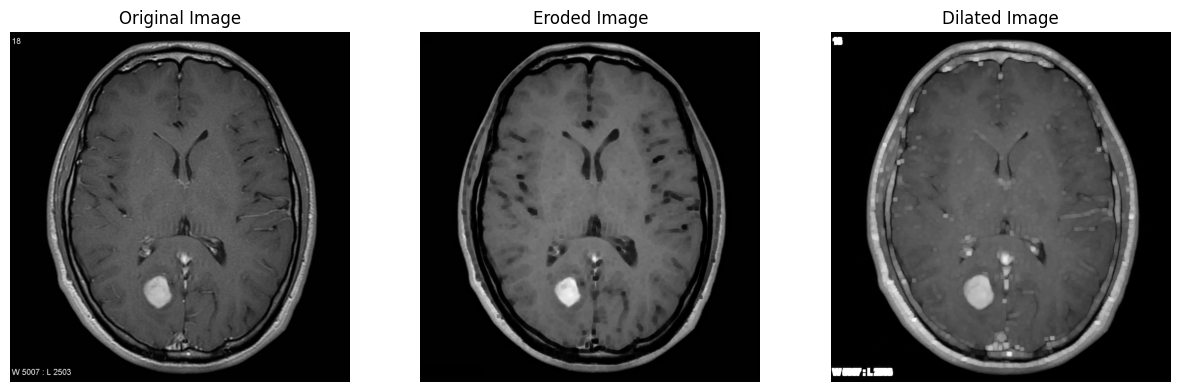

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv.imread('/content/brain mri.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the kernel
kernel = np.ones((7, 7), np.uint8)

# Perform all morphological operations
erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)

# Display all the images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Eroded image
plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Dilated image
plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Show the images
plt.show()

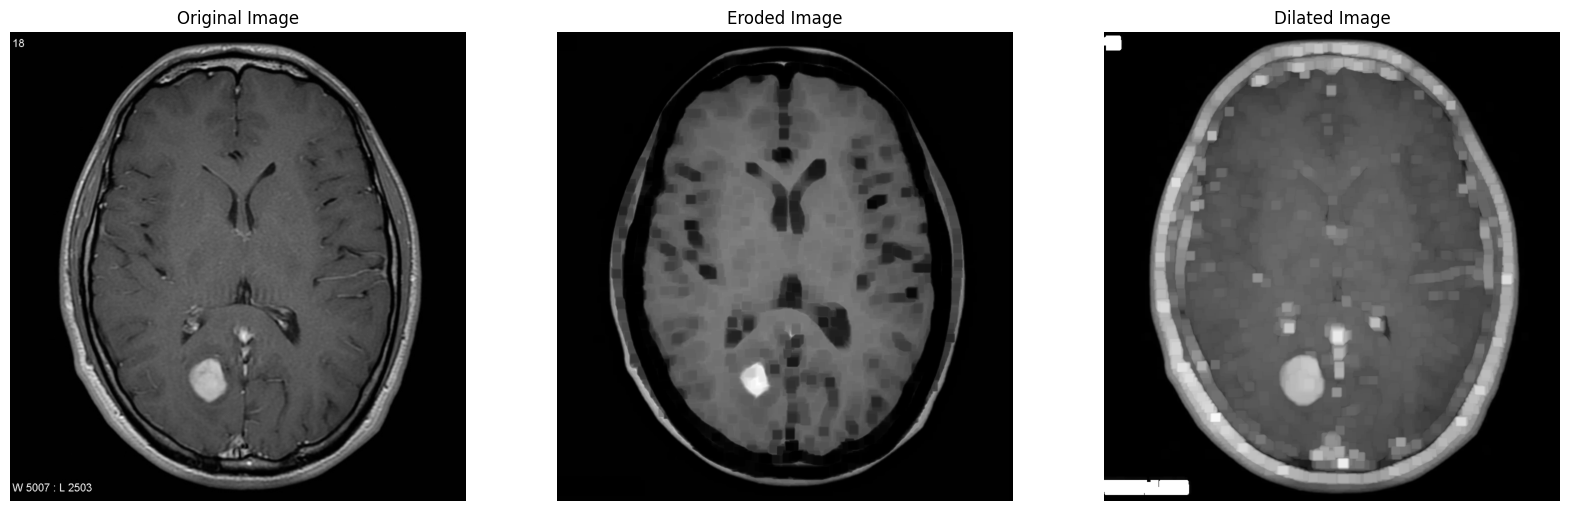

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv.imread('/content/brain mri.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the kernel
kernel = np.ones((15,15), np.uint8)

# Perform all morphological operations
erosion = cv.erode(img, kernel, iterations=1)
dilation = cv.dilate(img, kernel, iterations=1)

# Display all the images side by side
plt.figure(figsize=(20, 20))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Eroded image
plt.subplot(2, 3, 2)
plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Dilated image
plt.subplot(2, 3, 3)
plt.imshow(dilation, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Show the images
plt.show()

Opening Closing

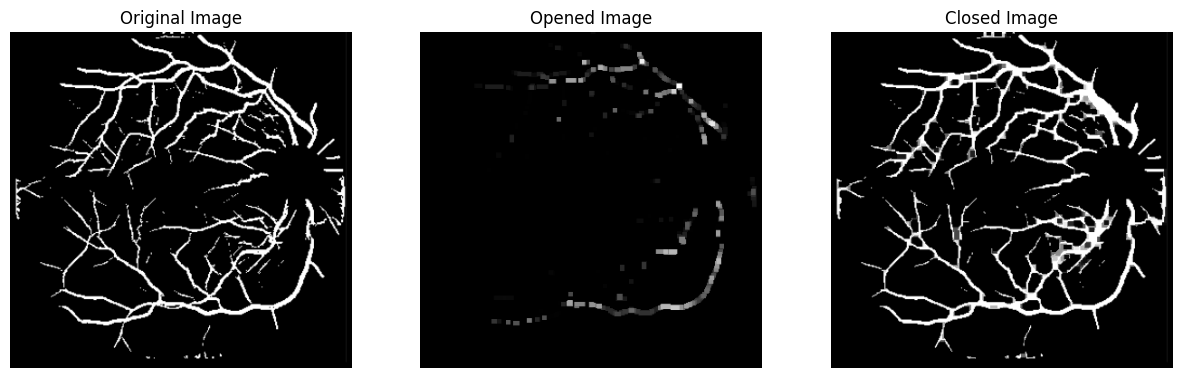

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv.imread('/content/featured.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

# Define the kernel
kernel = np.ones((5,5), np.uint8)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# Display all the images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Opened image
plt.subplot(2, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('Opened Image')
plt.axis('off')

# Closed image
plt.subplot(2, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('Closed Image')
plt.axis('off')

# Show the images
plt.show()

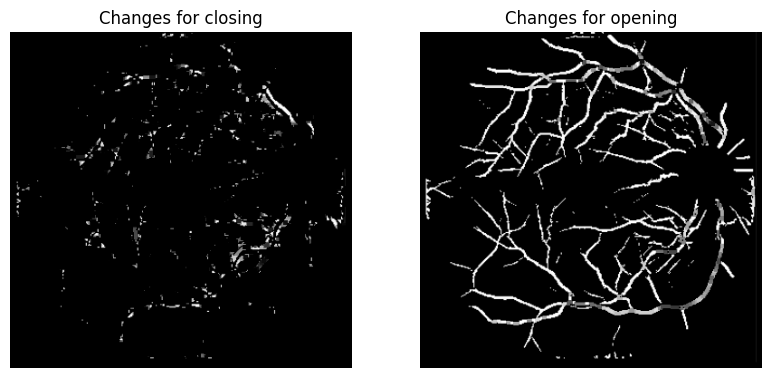

In [ ]:
from google.colab.patches import cv2_imshow
im2 = closing-img
im3 = img - opening

# Display all the images side by side
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(im2, cmap='gray')
plt.title('Changes for closing')
plt.axis('off')

# Opened image
plt.subplot(2, 3, 2)
plt.imshow(im3, cmap='gray')
plt.title('Changes for opening')
plt.axis('off')

# Show the images
plt.show()

# Image Transformation

*Scaling*

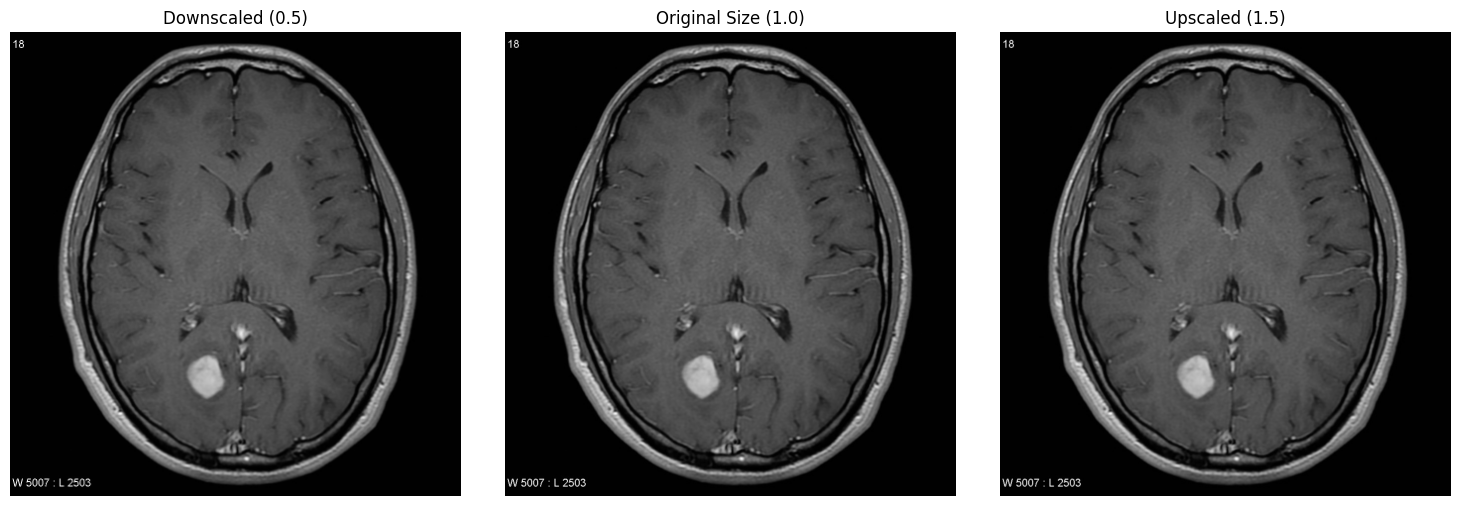

In [ ]:
import cv2
import matplotlib.pyplot as plt

def scale_image(image, scale_factor):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dim = (width, height)
    scaled_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return scaled_image

# Example: Load an image and create scaled versions
img = cv2.imread('/content/brain mri.jpg')  # Replace with your image path
scaled_img_1 = scale_image(img, 0.5)  # Downscaled
scaled_img_2 = scale_image(img, 1.0)  # Original size (no scaling)
scaled_img_3 = scale_image(img, 2)  # Upscaled

# Plot images side by side
plt.figure(figsize=(15, 5))  # Adjust the figure size

# First image
plt.subplot(1, 3, 1)  # 1 row, 3 columns, position 1
plt.imshow(cv2.cvtColor(scaled_img_1, cv2.COLOR_BGR2RGB))
plt.title('Downscaled (0.5)')
plt.axis('off')

# Second image
plt.subplot(1, 3, 2)  # 1 row, 3 columns, position 2
plt.imshow(cv2.cvtColor(scaled_img_2, cv2.COLOR_BGR2RGB))
plt.title('Original Size (1.0)')
plt.axis('off')

# Third image
plt.subplot(1, 3, 3)  # 1 row, 3 columns, position 3
plt.imshow(cv2.cvtColor(scaled_img_3, cv2.COLOR_BGR2RGB))
plt.title('Upscaled (1.5)')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Function to calculate the total number of pixels in an image
def get_pixel_count(image):
    return image.shape[0] * image.shape[1]

# Calculate pixel counts
pixel_count_1 = get_pixel_count(scaled_img_1)  # Downscaled image
pixel_count_2 = get_pixel_count(scaled_img_2)  # Original size image
pixel_count_3 = get_pixel_count(scaled_img_3)  # Upscaled image

# Display pixel counts
print(f"Pixel count of Downscaled (0.5): {pixel_count_1}")
print(f"Pixel count of Original Size (1.0): {pixel_count_2}")
print(f"Pixel count of Upscaled (1.5): {pixel_count_3}")

Pixel count of Downscaled (0.5): 213395
Pixel count of Original Size (1.0): 854518
Pixel count of Upscaled (1.5): 3418072


***Rotation***

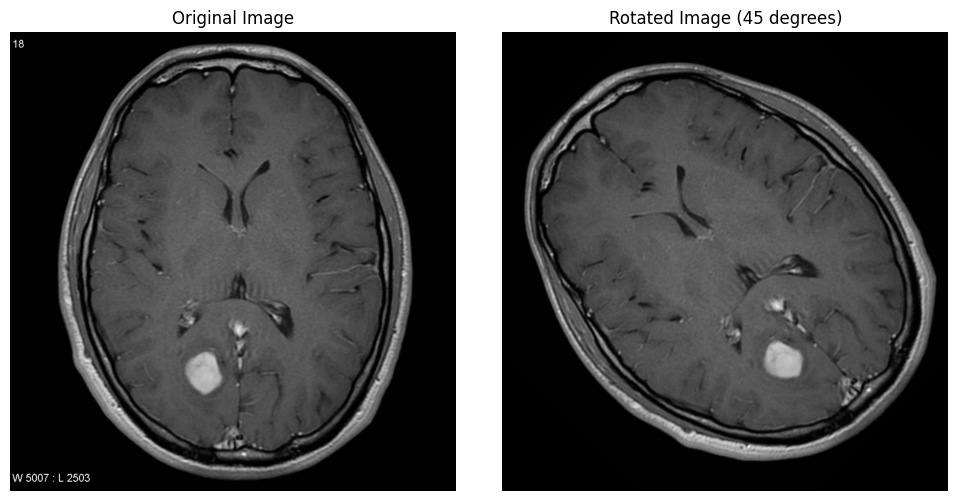

In [ ]:
import cv2
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (w, h))
    return rotated_image

# Load the original image
img = cv2.imread('/content/brain mri.jpg')  # Replace with your image path

# Rotate the image by 45 degrees
rotated_img = rotate_image(img, 45)

# Plot the original and rotated images
plt.figure(figsize=(10, 5))  # Adjust figure size

# Original image
plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Rotated image
plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (45 degrees)')
plt.axis('off')

# Display the plot
plt.tight_layout()
plt.show()


Flipping

Flipping an image can be done horizontally or vertically using OpenCV's flip function.

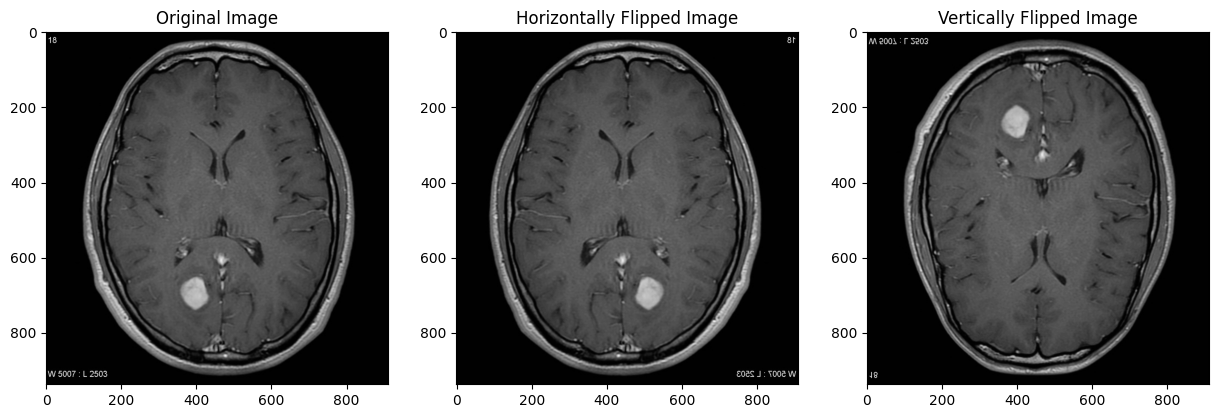

In [ ]:
# Horizontal flip
flipped_image_h = cv2.flip(image, 1)
# Vertical flip
flipped_image_v = cv2.flip(image, 0)

# Display input and output images side by side
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Horizontally Flipped Image')
plt.imshow(flipped_image_h, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Vertically Flipped Image')
plt.imshow(flipped_image_v, cmap='gray')
plt.show()

Zooming

Zooming into an image can be achieved by cropping and resizing the image to the original dimensions.

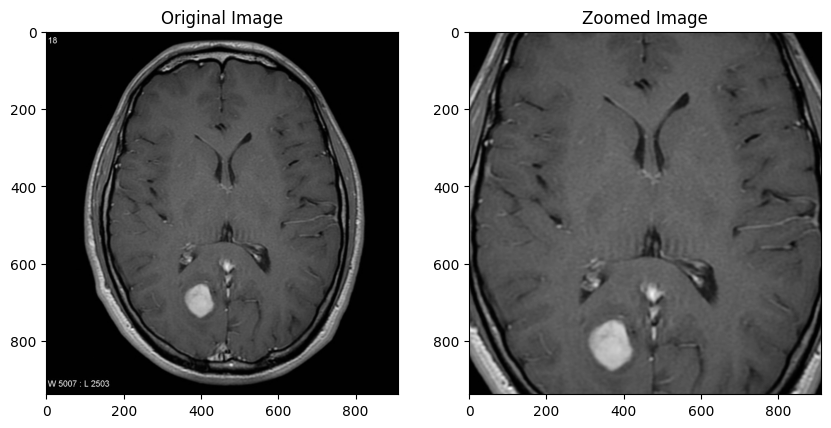

In [ ]:
def zoom_image(image, zoom_factor):
    height, width = image.shape[:2]
    # Calculate cropping coordinates
    new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)
    top = (height - new_height) // 2
    left = (width - new_width) // 2
    bottom = top + new_height
    right = left + new_width

    # Crop and resize the image
    cropped_image = image[top:bottom, left:right]
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)
    return zoomed_image

image = cv2.imread('/content/brain mri.jpg', cv2.IMREAD_GRAYSCALE)
zoomed_image = zoom_image(image, 1.5)

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image')
plt.imshow(zoomed_image, cmap='gray')
plt.show()

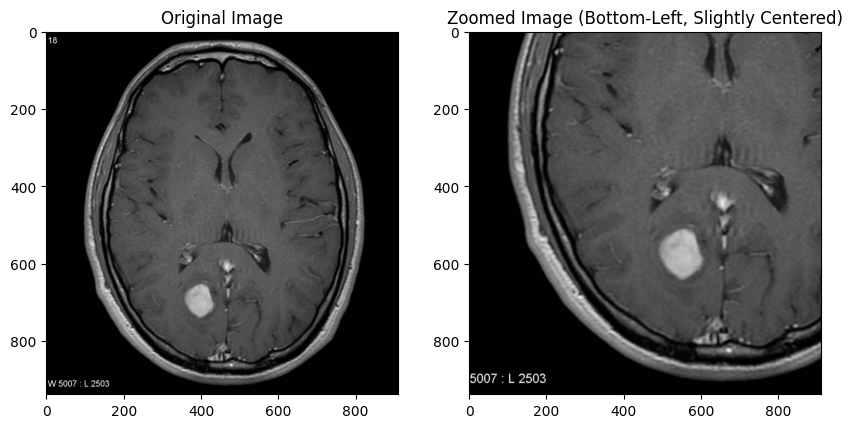

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(image, zoom_factor, region='bottom_left_slightly_centered'):
    height, width = image.shape[:2]

    if region == 'bottom_left_slightly_centered':
        # Define the new region closer to the center of the bottom-left corner
        new_height, new_width = int(height / zoom_factor), int(width / zoom_factor)

        # Adjust the top and left positions to zoom slightly to the center
        top = height - new_height  # Start from the bottom

        # Adjust left position to crop 30% from the right
        left = width - new_width - int(width * 0.3)  # Move 30% from the right

    # Crop the image based on the region
    cropped_image = image[top:top+new_height, left:left+new_width]

    # Resize the cropped image back to original size (zoom effect)
    zoomed_image = cv2.resize(cropped_image, (width, height), interpolation=cv2.INTER_LINEAR)

    return zoomed_image

# Load image in grayscale
image = cv2.imread('/content/brain mri.jpg', cv2.IMREAD_GRAYSCALE)

# Zoom into the bottom-left region close to the center
zoomed_image = zoom_image(image, zoom_factor=1.5, region='bottom_left_slightly_centered')

# Display input and output images side by side
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Zoomed Image (Bottom-Left, Slightly Centered)')
plt.imshow(zoomed_image, cmap='gray')
plt.show()